In [30]:
import numpy as np

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Input
from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping

In [31]:
class Model:
    def __init__(self, sign_labels_file_path, data_set_path, model_save_path, random_state) -> None:
        self.data_set_path = data_set_path
        self.model_save_path = model_save_path
        self.sign_labels = self.get_sign_labels(sign_labels_file_path)
        self.random_state = random_state

        # self.model = Sequential([
        #     Input((21 * 2, )), # TODO: cannot be fused with the following layer
        #     Dropout(0.2),
        #     Dense(20, activation='relu'),
        #     Dropout(0.4),
        #     Dense(10, activation='relu'),
        #     Dense(len(self.sign_labels), activation='softmax') # experiment with different activation functions
        # ])
        self.model = Sequential([
            Input((21 * 2, )), # TODO: cannot be fused with the following layer
            Dropout(0.2),
            Dense(80, activation='relu'),
            Dropout(0.4),
            Dense(40, activation='relu'),
            Dense(len(self.sign_labels), activation='softmax') # experiment with different activation functions
        ])
    
    def get_sign_labels(self, sign_labels_file_path):
                # check if file exists
        try:
            with open(sign_labels_file_path, 'r') as file:
                pass
        except FileNotFoundError:
            print(f'File : [{sign_labels_file_path}] not found!') # TODO: accentuate the file path in the other file too
            exit(1) # FIXME: maybe handle this better ?

        sign_labels = []
        with open(sign_labels_file_path, 'r') as file:
            sign_labels = file.read().splitlines()
        file.close()

        return np.array(sign_labels)
                
    
    def load_data_set(self):
        # TODO: see how you can change these
        X_data = np.loadtxt(self.data_set_path, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))
        y_data = np.loadtxt(self.data_set_path, delimiter=',', dtype='int32', usecols=(0))
        
        return train_test_split(X_data, y_data, test_size=0.2, random_state=55) # TODO: try different number
    
    def save_model(self):
        self.model.save(self.model_save_path)

In [32]:
ATTEMPT = '18_abc_2'

In [33]:
!pwd

/home/aicore/ursu/SignLanguageDetection/SignLanguageRecognition/ImprovedCode/code


In [34]:
model = Model(
    sign_labels_file_path = '../data/sign_labels_abc.csv',
    data_set_path = '../data/data_set_abc.csv', # may need to change the path
    model_save_path = f'../models/model{ATTEMPT}.h5',
    random_state=0
    )

X_train, X_test, y_train, y_test = model.load_data_set()

In [35]:
model.model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_4 (Dropout)         (None, 42)                0         
                                                                 
 dense_6 (Dense)             (None, 80)                3440      
                                                                 
 dropout_5 (Dropout)         (None, 80)                0         
                                                                 
 dense_7 (Dense)             (None, 40)                3240      
                                                                 
 dense_8 (Dense)             (None, 26)                1066      
                                                                 
Total params: 7746 (30.26 KB)
Trainable params: 7746 (30.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
checkpoint = ModelCheckpoint(model.model_save_path, verbose=1, save_weights_only=False) # what is this ?
early_stopping = EarlyStopping(patience=20, verbose=1) # what is this ?
tensor_board = TensorBoard(log_dir='./logs', histogram_freq=1) # what is this ?

In [37]:
model.model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['categorical_accuracy']
)

In [38]:
results = model.model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128, # may wanna try to change this too
    validation_data=(X_test, y_test),
    # callbacks=[tensor_board, checkpoint, early_stopping]
    callbacks=[tensor_board, checkpoint]
)

Epoch 1/1000


 1/17 [>.............................] - ETA: 6s - loss: 3.2795 - categorical_accuracy: 0.0000e+00
Epoch 1: saving model to ../models/model18_abc_2.h5
17/17 [==============================] - 1s 12ms/step - loss: 3.2490 - categorical_accuracy: 0.0014 - val_loss: 3.2160 - val_categorical_accuracy: 0.0000e+00
Epoch 2/1000
 1/17 [>.............................] - ETA: 0s - loss: 3.2114 - categorical_accuracy: 0.0000e+00
Epoch 2: saving model to ../models/model18_abc_2.h5
17/17 [==============================] - 0s 6ms/step - loss: 3.2071 - categorical_accuracy: 4.7801e-04 - val_loss: 3.1606 - val_categorical_accuracy: 0.0000e+00
Epoch 3/1000
 1/17 [>.............................] - ETA: 0s - loss: 3.1843 - categorical_accuracy: 0.0000e+00

/home/aicore/miniconda3/envs/actionRec/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: saving model to ../models/model18_abc_2.h5
17/17 [==============================] - 0s 6ms/step - loss: 3.1410 - categorical_accuracy: 0.0000e+00 - val_loss: 3.0608 - val_categorical_accuracy: 0.0000e+00
Epoch 4/1000
 1/17 [>.............................] - ETA: 0s - loss: 3.0984 - categorical_accuracy: 0.0000e+00
Epoch 4: saving model to ../models/model18_abc_2.h5
17/17 [==============================] - 0s 6ms/step - loss: 3.0358 - categorical_accuracy: 9.5602e-04 - val_loss: 2.9290 - val_categorical_accuracy: 0.0000e+00
Epoch 5/1000
 1/17 [>.............................] - ETA: 0s - loss: 3.0036 - categorical_accuracy: 0.0000e+00
Epoch 5: saving model to ../models/model18_abc_2.h5
17/17 [==============================] - 0s 7ms/step - loss: 2.9255 - categorical_accuracy: 0.0000e+00 - val_loss: 2.8119 - val_categorical_accuracy: 0.0000e+00
Epoch 6/1000
 1/17 [>.............................] - ETA: 0s - loss: 2.9050 - categorical_accuracy: 0.0000e+00
Epoch 6: saving model to

In [39]:
val_loss, val_acc = model.model.evaluate(X_test, y_test, batch_size=64)

9/9 [==============================] - 0s 1ms/step - loss: 0.2347 - categorical_accuracy: 0.0229


In [40]:
model.save_model()

In [41]:
# TODO:
# rewrite the existing class and add new ones
# plot data
# experiment with different models(diff layers, diff activation functions, diff optimizers, diff loss functions, diff metrics, etc)
# plot training and validation loss and accuracy
# make this code better

In [42]:
import matplotlib.pyplot as plt

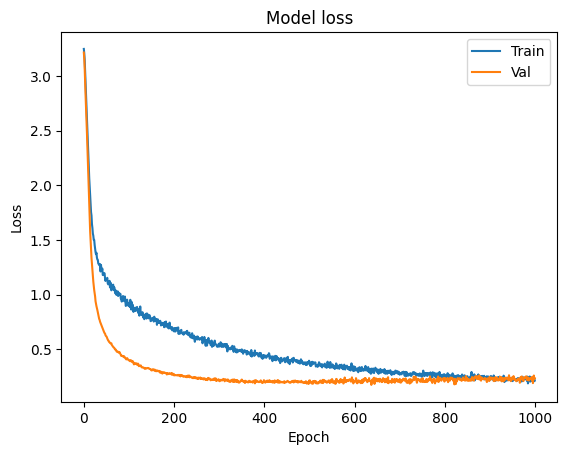

In [43]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.savefig(f'../images/model{ATTEMPT}.png')
plt.show()

NOTES:
- adding dropout makes the training loss go higher
